<h3 style="text-align: center">Non-linear boundary - 2 layers NN</h3>

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_points(X, y, m="_"):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker=m)
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker=m )

def plot_zone(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k',zorder=2, marker="+")
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k',zorder=2, marker="_" )  

def net(features):
    h = activation(torch.mm(features, W1) + B1)
    output = activation(torch.mm(h, W2) + B2)
    return output

def view(net):

    datamin = np.min(net.points, axis=0)
    datamax = np.max(net.points, axis=0)
    xmin, ymin = datamin
    xmax, ymax = datamax    
       
    border = []
    xList = np.linspace(xmin, xmax, 50)
    for x in xList:
        yList = np.linspace(ymin, ymax, 50)
        for y in yList:
            out = net.output(torch.Tensor([[x,y]]).double())
            if out >= 0.5:
                border.append([x,y,1]) 
            else:
                border.append([x,y,0])

    #print(border)
    border = np.array(border)
    solutionX = border[:, [0,1]]
    solutionT = border[:, [2]]
    plot_zone(solutionX, solutionT)

    plot_points(net.points, net.target,m="o")  

In [3]:
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [0,6,0],
    [-1,-1,1],
    [-2,10,1],
])

#data file
#data = pd.read_csv('data.csv', header=None)
#data = data.reset_index().to_numpy()
#data = data[:,[1,2,3]]

tensor(0.3696, dtype=torch.float64, grad_fn=<SumBackward0>)


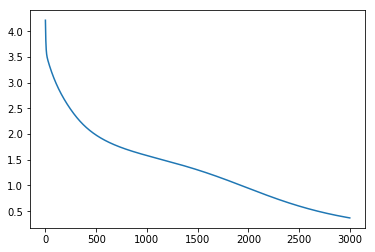

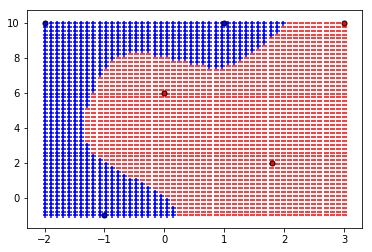

In [11]:
#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

activation = sigmoid
#activation = torch.nn.Sigmoid()

# Loss (cross entropy) error function
def error(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

class NN:
    def __init__(self, data):
        torch.manual_seed(1) # Set the random seed so things are predictable

        self.points = data[:, [0,1]]
        self.target = data[:, [2]]

        self.T = torch.from_numpy(self.target)#.double()
        self.features = torch.from_numpy(self.points).double()  #.float()           
        
        self.activation = activation
        self.error = error
        
        n_input = self.features.shape[1]    
        n_hidden1 = 10                 
        n_hidden2 = 20
        n_output = 1                   
        
        self.W1 = Variable(torch.randn(n_input,   n_hidden1, dtype=torch.double), requires_grad=True)
        self.W2 = Variable(torch.randn(n_hidden1, n_hidden2, dtype=torch.double), requires_grad=True)
        self.W3 = Variable(torch.randn(n_hidden2, n_output, dtype=torch.double),  requires_grad=True)
        
        self.B1 = Variable(torch.randn(1, n_hidden1, dtype=torch.double), requires_grad=True)
        self.B2 = Variable(torch.randn(1, n_hidden2, dtype=torch.double), requires_grad=True)        
        self.B3 = Variable(torch.randn(1, n_output, dtype=torch.double), requires_grad=True)        
     
    
    def output(self,features):
        h1     = self.activation(torch.mm(features, self.W1) + self.B1)
        h2     = self.activation(torch.mm(h1, self.W2) + self.B2)
        output = self.activation(torch.mm(h2, self.W3) + self.B3)
        return output
        
    def train(self, epochs = 100, alpha=0.01):   

        self.epochs = epochs
        self.alpha = alpha        
        
        self.lossHistory = []

        for i in range(epochs):
            E = self.error(self.output(self.features),self.T)
            
            loss = torch.sum(E)

            self.lossHistory.append(loss)
    
            loss.backward()
    
            with torch.no_grad():
                self.W1 -= self.alpha * self.W1.grad
                self.W2 -= self.alpha * self.W2.grad
                self.W3 -= self.alpha * self.W3.grad
                self.B1 -= self.alpha * self.B1.grad
                self.B2 -= self.alpha * self.B2.grad
                self.B3 -= self.alpha * self.B3.grad

                # Manually zero the gradients after updating weights
                self.W1.grad.zero_()
                self.W2.grad.zero_()
                self.W3.grad.zero_()
                self.B1.grad.zero_()
                self.B2.grad.zero_()
                self.B3.grad.zero_()
        
        
        
        
net = NN(data)               
net.train(epochs=3000)  #2000

print(net.lossHistory[len(net.lossHistory)-1])
plt.plot(net.lossHistory)
plt.show()

view(net)


In [7]:
#view(net)